# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

### Menyiapkan data yang akan digunakan

data yang digunakan merupakan ilustrasi yang digunakan untuk latihan membantu jaya jaya institut menyelesaikan permasalahan yang dihadapi.

In [2]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'
df = pd.read_csv(url, sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.to_csv('cleaned_dataset.csv', index=False)

#### mengecek missing values

In [5]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


#### mengecek duplikasi pada data

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

Data terdiri dari 37 coloumn dan tidak memiliki missing value dan duplikat data. tapi berdasarkan tipe data kita akan mengubah pada kolom status menjadi numerik untuk memudahkan modeling data.

In [7]:
df['Status'].value_counts()


Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

**mengubah type data kolom status menjadi integer**

In [8]:
df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [9]:
df['Status'] = df['Status'].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

semua kolom sudah menjadi nilai numerik.

In [10]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [11]:
dropout_df = df.drop(df[df.Status != 0].index)
dropout_df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0
12,1,1,2,9853,1,1,133.0,1,19,37,...,0,6,0,0,0.000000,0,12.7,3.7,-1.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,2,39,1,9773,1,1,100.0,1,37,37,...,0,6,10,6,11.666667,0,12.7,3.7,-1.70,0
4411,1,44,1,9130,1,39,150.0,1,37,37,...,0,6,11,3,13.333333,0,13.9,-0.3,0.79,0
4415,4,39,1,9500,1,19,133.1,1,37,37,...,0,7,12,3,11.083333,0,11.1,0.6,2.02,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0


## Exploratory Data Analysis

Distribusi Target (Status)

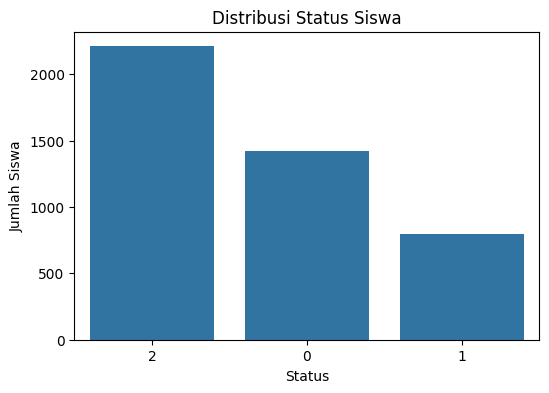

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title('Distribusi Status Siswa')
plt.xlabel('Status')
plt.ylabel('Jumlah Siswa')
plt.show()


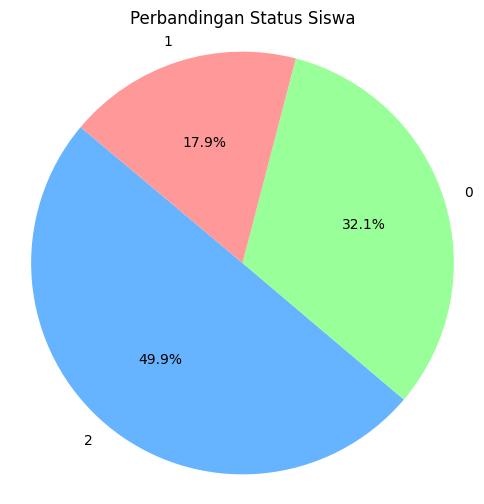

In [13]:
# Hitung jumlah tiap status
status_counts = df['Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Perbandingan Status Siswa')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran sempurna
plt.show()

Distribusi Fitur Previous_qualification_grade

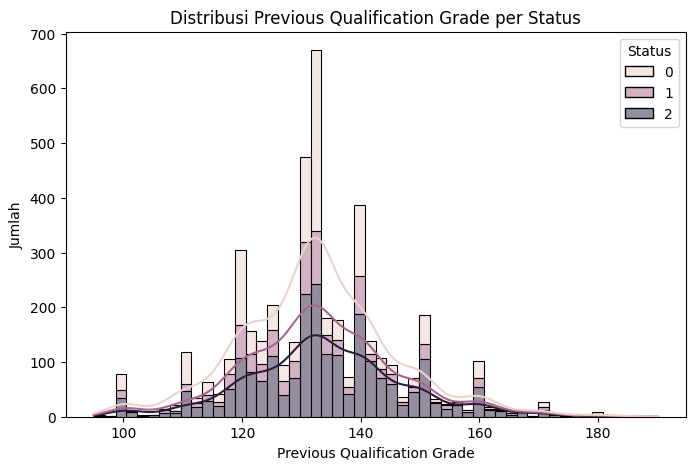

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Previous_qualification_grade', hue='Status', kde=True, multiple='stack')
plt.title('Distribusi Previous Qualification Grade per Status')
plt.xlabel('Previous Qualification Grade')
plt.ylabel('Jumlah')
plt.show()


Distribusi Fitur Marital_status

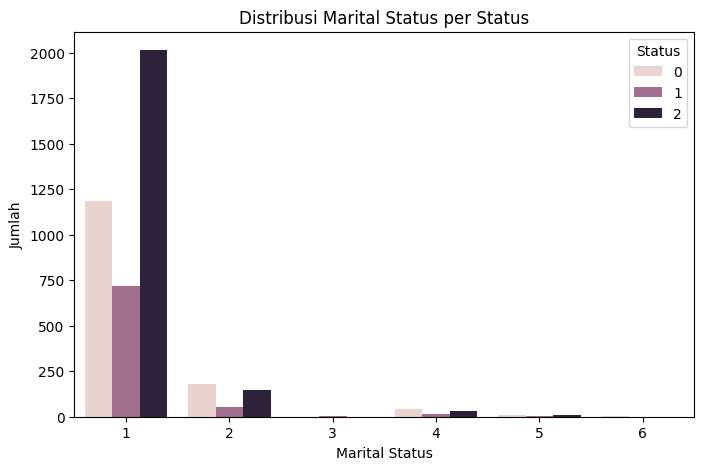

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_status', hue='Status')
plt.title('Distribusi Marital Status per Status')
plt.xlabel('Marital Status')
plt.ylabel('Jumlah')
plt.show()


Boxplot fitur Curricular_units_1st_sem_grade dibandingkan dengan status

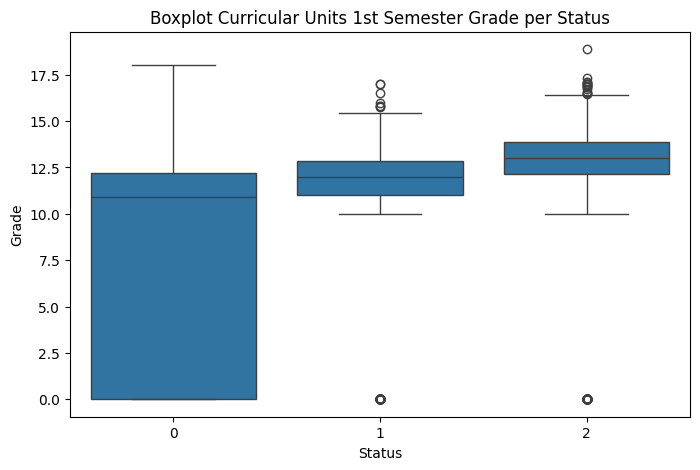

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_grade')
plt.title('Boxplot Curricular Units 1st Semester Grade per Status')
plt.xlabel('Status')
plt.ylabel('Grade')
plt.show()


mencari features importance terhadap status

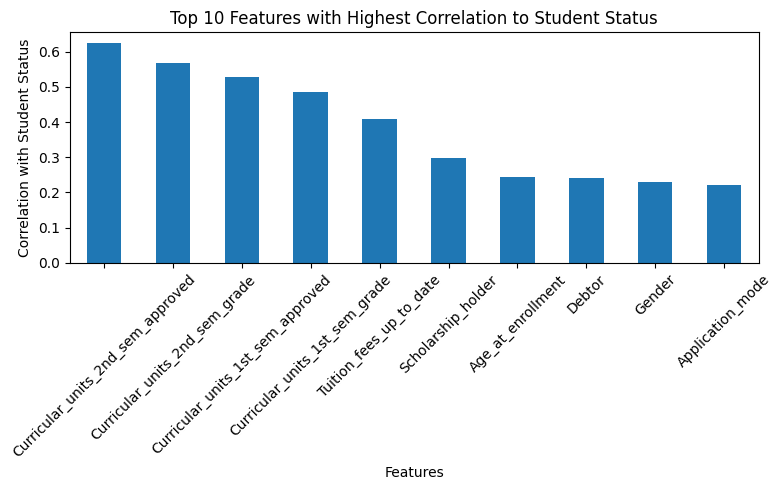

In [17]:
# Ambil 10 fitur teratas dengan korelasi tertinggi terhadap 'Status'
top_corr = df.corr()['Status'].drop('Status').abs().nlargest(10)

# Plot
plt.figure(figsize=(8, 5))
top_corr.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')
plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Curricular_units_2nd_sem_approved dan Curricular_units_2nd_sem_grade adalah fitur paling penting. Artinya, performa akademik semester kedua menjadi indikator utama apakah siswa akan dropout atau tidak.
- Fitur-fitur lain seperti Curricular_units_1st_sem_approved, Curricular_units_1st_sem_grade, dan Admission_grade juga cukup penting, menunjukkan performa semester pertama dan nilai masuk juga berperan.
- Fitur-fitur non-akademik seperti Tuition_fees_up_to_date dan Age_at_enrollment juga masuk daftar, meski pengaruhnya relatif lebih kecil.

In [18]:

df = df.drop(columns=['Unemployment_rate', 'Inflation_rate', 'GDP',
                                'International', 'Nacionality', 'Educational_special_needs'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Mothers_qualification                         4424 non-null   int64  
 8   Fathers_qualification                         4424 non-null   int64  
 9   Mothers_occupation                            4424 non-null   i

## Data Preparation / Preprocessing

In [19]:
df_model = df.copy()
df_model = df_model.drop(columns=['Daytime_evening_attendance',
                          'Curricular_units_2nd_sem_evaluations',
                          'Fathers_occupation', 'Mothers_occupation',
                          'Fathers_qualification', 'Mothers_qualification',
                          'Curricular_units_1st_sem_evaluations',
                          'Curricular_units_1st_sem_without_evaluations',
                          'Curricular_units_2nd_sem_without_evaluations',
                          'Application_mode',
                          'Application_order', 'Course',
                          'Previous_qualification', 'Admission_grade',
                          'Previous_qualification_grade'], axis=1)

In [20]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Marital_status                     4424 non-null   int64  
 1   Displaced                          4424 non-null   int64  
 2   Debtor                             4424 non-null   int64  
 3   Tuition_fees_up_to_date            4424 non-null   int64  
 4   Gender                             4424 non-null   int64  
 5   Scholarship_holder                 4424 non-null   int64  
 6   Age_at_enrollment                  4424 non-null   int64  
 7   Curricular_units_1st_sem_credited  4424 non-null   int64  
 8   Curricular_units_1st_sem_enrolled  4424 non-null   int64  
 9   Curricular_units_1st_sem_approved  4424 non-null   int64  
 10  Curricular_units_1st_sem_grade     4424 non-null   float64
 11  Curricular_units_2nd_sem_credited  4424 non-null   int64

In [21]:
df_model['dropout'] = df_model['Status'].map(lambda x: 1 if x == 0 else 0)
df_model.drop(['Status'], axis=1, inplace=True)
df_model['dropout']

0       1
1       0
2       1
3       0
4       0
       ..
4419    0
4420    1
4421    1
4422    0
4423    0
Name: dropout, Length: 4424, dtype: int64

In [22]:
# Pisahkan fitur dan target
X = df_model.drop('dropout', axis=1)
y = df_model['dropout']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train)
X_train=pd.DataFrame(minmaxscaler.transform(X_train),columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(minmaxscaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 15)
(885, 15)
(3539,)
(885,)


## Modeling

In [25]:
models={'LogisticRegression()':LogisticRegression(),
        'Random Forest':RandomForestClassifier(),
        'Gradient Boosting':GradientBoostingClassifier()}

for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    print(model.score(X_test,y_test))

LogisticRegression()
0.8576271186440678
Random Forest
0.8666666666666667
Gradient Boosting
0.8745762711864407


Dari daftar model di atas, tingkat accuracy paling tinggi ada pada model Gradient Boosting. Maka GradientBoostingClassifier() yang dipilih menjadi model.

In [26]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

## Evaluation

In [27]:
accuracy_score(y_test, pred)

0.8745762711864407

In [30]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[565,  36],
       [ 75, 209]], dtype=int64)

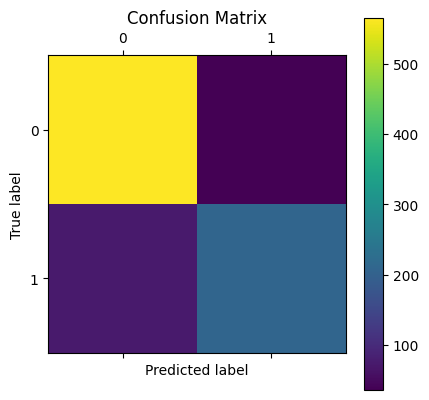

In [31]:
matrix = confusion_matrix(y_test, pred)
plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Model Deployment

In [32]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)